<a href="https://colab.research.google.com/github/RealRipper/AutomaticNumberPlateDetection-ANPR/blob/main/NumberPlateDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!pip install easyocr
!pip install imutils
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 19.1 MB/s eta 0:00:00


In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

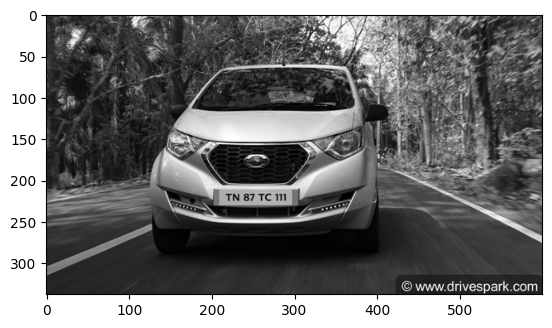

In [30]:
img = cv2.imread('/content/Sample.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

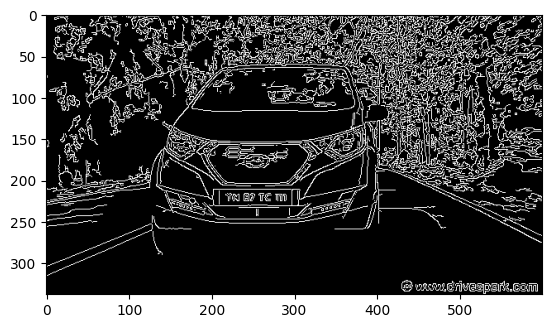

In [29]:
img = cv2.imread('/content/Sample.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)  # Noise Reduction
edged = cv2.Canny(bfilter, 30, 200)

plt.imshow(edged, cmap='gray')
plt.show()

In [31]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [32]:
location = None
for contour in contours:
    approx = cv2. approxPolyDP (contour, 10, True)
    if len(approx) == 4:
       location = approx
       break

In [33]:
location

array([[[202, 212]],

       [[296, 211]],

       [[297, 230]],

       [[204, 231]]], dtype=int32)

In [34]:
mask = np.zeros (gray.shape, np.uint8)
new_image = cv2.drawContours (mask, [location], 0,255, -1)
new_image = cv2.bitwise_and (img, img, mask=mask)

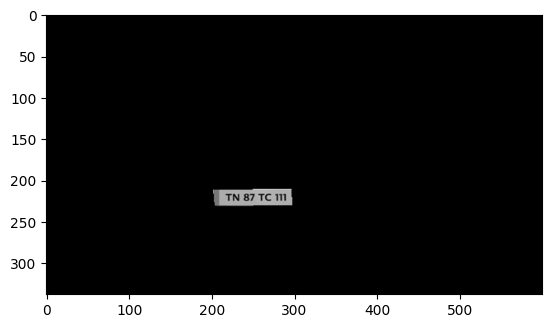

In [35]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

In [36]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

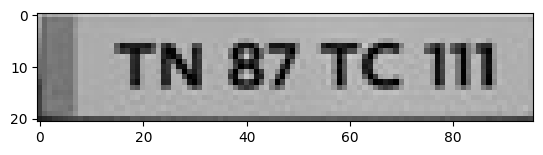

In [37]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()

In [38]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[15, 3], [93, 3], [93, 19], [15, 19]], 'TN 87 TC 111', 0.9579152754503321)]

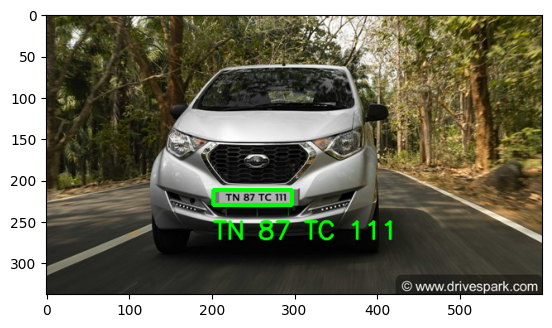

In [39]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img,text=text,org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA, bottomLeftOrigin=False)
res - cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))
plt.show()